In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = f"Cats-vs-dogs-cnn-64x2-{int(time.time())}"

tensorboard = TensorBoard(log_dir=f'logs/{NAME}')

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

#model.add(Dense(64))
#model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

model.fit(X, y, batch_size=32, validation_split=0.1, epochs=5, callbacks=[tensorboard])

Train on 22451 samples, validate on 2495 samples
Epoch 1/5
22451/22451 [==============================] - 71s 3ms/sample - loss: 0.6144 - accuracy: 0.6547 - val_loss: 0.5336 - val_accuracy: 0.7335
Epoch 2/5
22451/22451 [==============================] - 67s 3ms/sample - loss: 0.5183 - accuracy: 0.7467 - val_loss: 0.4962 - val_accuracy: 0.7571
Epoch 3/5
22451/22451 [==============================] - 72s 3ms/sample - loss: 0.4812 - accuracy: 0.7704 - val_loss: 0.4798 - val_accuracy: 0.7659
Epoch 4/5
22451/22451 [==============================] - 69s 3ms/sample - loss: 0.4558 - accuracy: 0.7868 - val_loss: 0.4652 - val_accuracy: 0.7792
Epoch 5/5
22451/22451 [==============================] - 67s 3ms/sample - loss: 0.4341 - accuracy: 0.7988 - val_loss: 0.4882 - val_accuracy: 0.7655


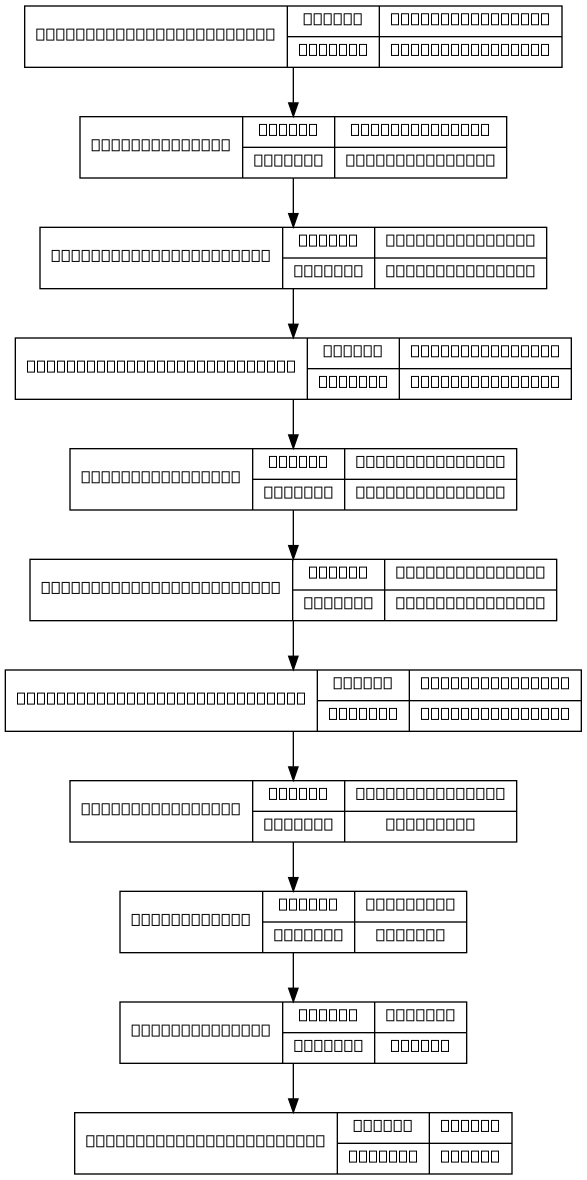

In [3]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)